In [90]:
#Basic
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from IPython.display import clear_output

#Feature Engineering
import re
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings('ignore')

In [4]:
StuPerf_df = pd.read_csv('StudentPerformanceFactors.csv', sep=',')

In [9]:
#Lets print the tables

print(StuPerf_df)

      Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0                23          84                  Low                High   
1                19          64                  Low              Medium   
2                24          98               Medium              Medium   
3                29          89                  Low              Medium   
4                19          92               Medium              Medium   
...             ...         ...                  ...                 ...   
6602             25          69                 High              Medium   
6603             23          76                 High              Medium   
6604             20          90               Medium                 Low   
6605             10          86                 High                High   
6606             15          67               Medium                 Low   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
0                     

In [14]:
#What is the data types?

StuPerf_df.dtypes

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

In [18]:
#How big is the table?

StuPerf_df.shape

(6607, 20)

In [20]:
# Checking null values 
StuPerf_df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [22]:
# Checking null values in %
StuPerf_df.isnull().sum() / StuPerf_df.shape[0] * 100

Hours_Studied                 0.000000
Attendance                    0.000000
Parental_Involvement          0.000000
Access_to_Resources           0.000000
Extracurricular_Activities    0.000000
Sleep_Hours                   0.000000
Previous_Scores               0.000000
Motivation_Level              0.000000
Internet_Access               0.000000
Tutoring_Sessions             0.000000
Family_Income                 0.000000
Teacher_Quality               1.180566
School_Type                   0.000000
Peer_Influence                0.000000
Physical_Activity             0.000000
Learning_Disabilities         0.000000
Parental_Education_Level      1.362192
Distance_from_Home            1.014076
Gender                        0.000000
Exam_Score                    0.000000
dtype: float64

In [24]:
# Get rid of the null data

StuPerf_df_na = StuPerf_df.dropna()
print(StuPerf_df_na.shape)
StuPerf_df_na.isnull().sum()

(6378, 20)


Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [26]:
#Lets see what the data looks like 

StuPerf_df_na.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,7.034964,75.066165,1.495296,2.972719,67.252117
std,5.985460,11.550723,1.468033,14.400389,1.233984,1.028926,3.914217
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


In [28]:
#There are values exceeding 100 in the test scores. As these are outliers, we will remove them.

StuPerf_df_cleaned =StuPerf_df_na[StuPerf_df_na['Exam_Score'] <= 100]
StuPerf_df_cleaned.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000,6377.000000
mean,19.976008,80.018034,7.035126,75.063353,1.494747,2.972714,67.246825
std,5.985283,11.549434,1.468091,14.399766,1.233300,1.029006,3.891637
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,100.000000


In [30]:
StuPerf_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6377 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6377 non-null   int64 
 1   Attendance                  6377 non-null   int64 
 2   Parental_Involvement        6377 non-null   object
 3   Access_to_Resources         6377 non-null   object
 4   Extracurricular_Activities  6377 non-null   object
 5   Sleep_Hours                 6377 non-null   int64 
 6   Previous_Scores             6377 non-null   int64 
 7   Motivation_Level            6377 non-null   object
 8   Internet_Access             6377 non-null   object
 9   Tutoring_Sessions           6377 non-null   int64 
 10  Family_Income               6377 non-null   object
 11  Teacher_Quality             6377 non-null   object
 12  School_Type                 6377 non-null   object
 13  Peer_Influence              6377 non-null   object
 1

array([[<Axes: title={'center': 'Hours_Studied'}>,
        <Axes: title={'center': 'Attendance'}>,
        <Axes: title={'center': 'Sleep_Hours'}>],
       [<Axes: title={'center': 'Previous_Scores'}>,
        <Axes: title={'center': 'Tutoring_Sessions'}>,
        <Axes: title={'center': 'Physical_Activity'}>],
       [<Axes: title={'center': 'Exam_Score'}>, <Axes: >, <Axes: >]],
      dtype=object)

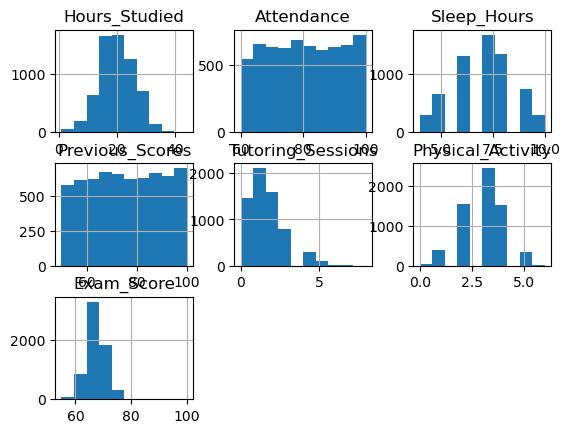

In [38]:
StuPerf_df_cleaned.hist()

array([[<Axes: title={'center': 'Exam_Score'}>]], dtype=object)

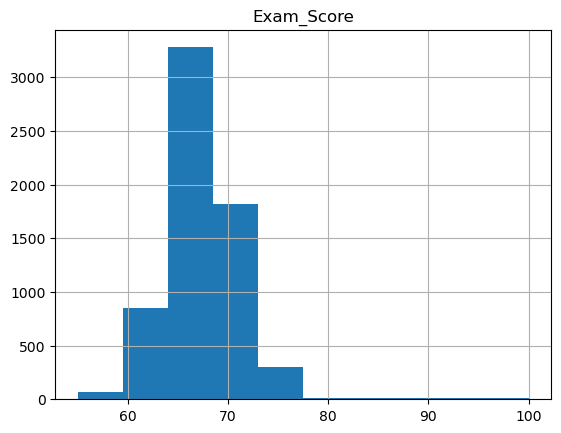

In [34]:
StuPerf_df_cleaned.hist('Exam_Score')

<Axes: xlabel='Exam_Score'>

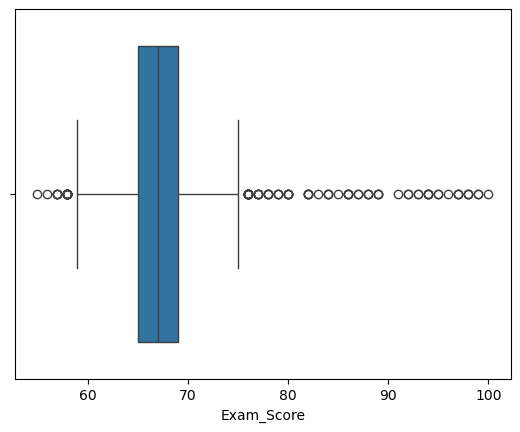

In [46]:
sns.boxplot(x=StuPerf_df_cleaned['Exam_Score'])

array([[<Axes: title={'center': 'Hours_Studied'}>]], dtype=object)

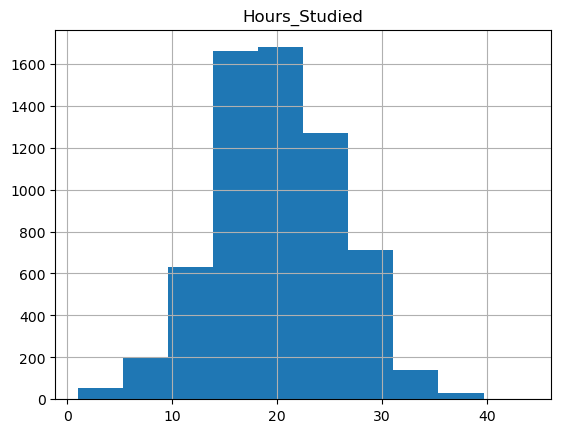

In [42]:
StuPerf_df_cleaned.hist('Hours_Studied')

<Axes: >

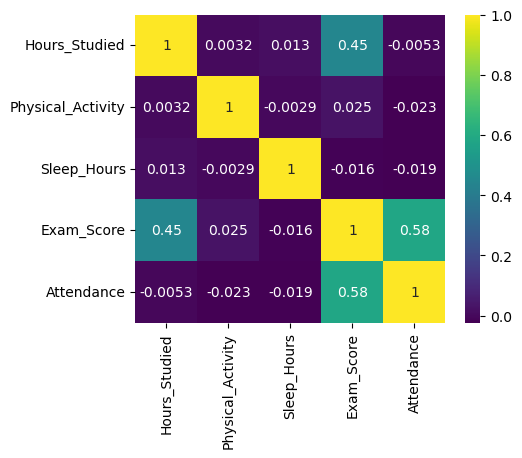

In [76]:
corr_col = ['Hours_Studied', 'Physical_Activity', 'Sleep_Hours', 'Exam_Score','Attendance']
StuPerf_df_cleaned_corr = StuPerf_df_cleaned[corr_col]

corr = StuPerf_df_cleaned_corr.corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='viridis')

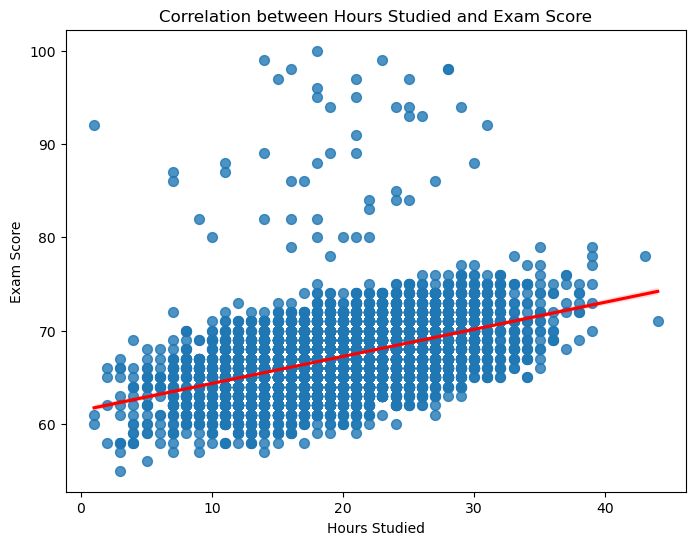

In [44]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Hours_Studied', y='Exam_Score', data=StuPerf_df_cleaned, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Correlation between Hours Studied and Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.show()

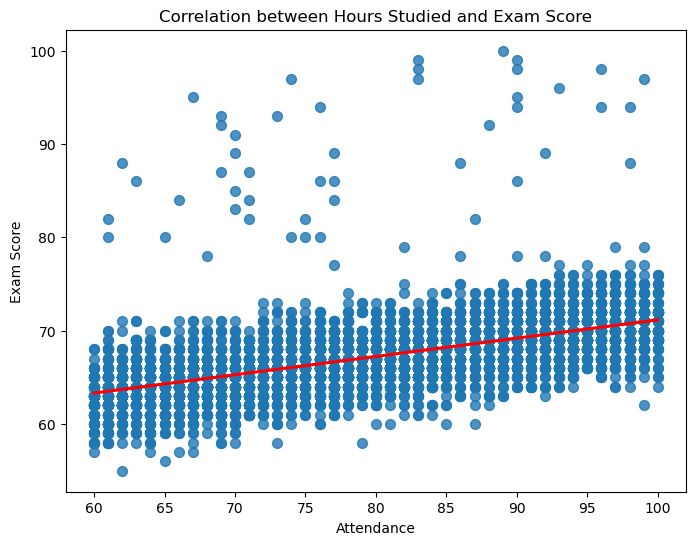

In [56]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Attendance', y='Exam_Score', data=StuPerf_df_cleaned, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Correlation between Hours Studied and Exam Score')
plt.xlabel('Attendance')
plt.ylabel('Exam Score')
plt.show()

In [78]:
for x in StuPerf_df_cleaned.keys():
    print(f'the value of x is: {x}')

the value of x is: Hours_Studied
the value of x is: Attendance
the value of x is: Parental_Involvement
the value of x is: Access_to_Resources
the value of x is: Extracurricular_Activities
the value of x is: Sleep_Hours
the value of x is: Previous_Scores
the value of x is: Motivation_Level
the value of x is: Internet_Access
the value of x is: Tutoring_Sessions
the value of x is: Family_Income
the value of x is: Teacher_Quality
the value of x is: School_Type
the value of x is: Peer_Influence
the value of x is: Physical_Activity
the value of x is: Learning_Disabilities
the value of x is: Parental_Education_Level
the value of x is: Distance_from_Home
the value of x is: Gender
the value of x is: Exam_Score


In [94]:
le = LabelEncoder()

for x in StuPerf_df_cleaned.keys():
    if x in ['Hours_Studied', 'Attendance', 'work_year','Sleep_Hours','Previous_Scores','Tutoring_Sessions','Physical_Activity','Exam_Score']:
        print("SKIIIIIP")
    else:
        StuPerf_df_cleaned[f'{x}_enc'] = le.fit_transform(StuPerf_df_cleaned[x])

SKIIIIIP
SKIIIIIP
SKIIIIIP
SKIIIIIP
SKIIIIIP
SKIIIIIP
SKIIIIIP


In [96]:
StuPerf_df_cleaned.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Motivation_Level_enc,Internet_Access_enc,Family_Income_enc,Teacher_Quality_enc,School_Type_enc,Peer_Influence_enc,Learning_Disabilities_enc,Parental_Education_Level_enc,Distance_from_Home_enc,Gender_enc
0,23,84,Low,High,No,7,73,Low,Yes,0,...,1,1,1,2,1,2,0,1,2,1
1,19,64,Low,Medium,No,8,59,Low,Yes,2,...,1,1,2,2,1,0,0,0,1,0
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,...,2,1,2,2,1,1,0,2,2,1
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,...,2,1,2,2,1,0,0,1,1,1
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,...,2,1,2,0,1,1,0,0,2,0


In [98]:
StuPerf_df_cleaned[["Parental_Education_Level", "Parental_Education_Level_enc"]]. head(10)

,Parental_Education_Level,Parental_Education_Level_enc
0,High School,1
1,College,0
2,Postgraduate,2
3,High School,1
4,College,0
5,Postgraduate,2
6,High School,1
7,High School,1
8,College,0
9,High School,1


In [100]:
StuPerf_df_cleaned[["Family_Income", "Family_Income_enc"]]. head(6000)

,Family_Income,Family_Income_enc
0,Low,1
1,Medium,2
2,Medium,2
3,Medium,2
4,Medium,2
...,...,...
6205,Low,1
6206,Medium,2
6207,Medium,2
6208,Low,1


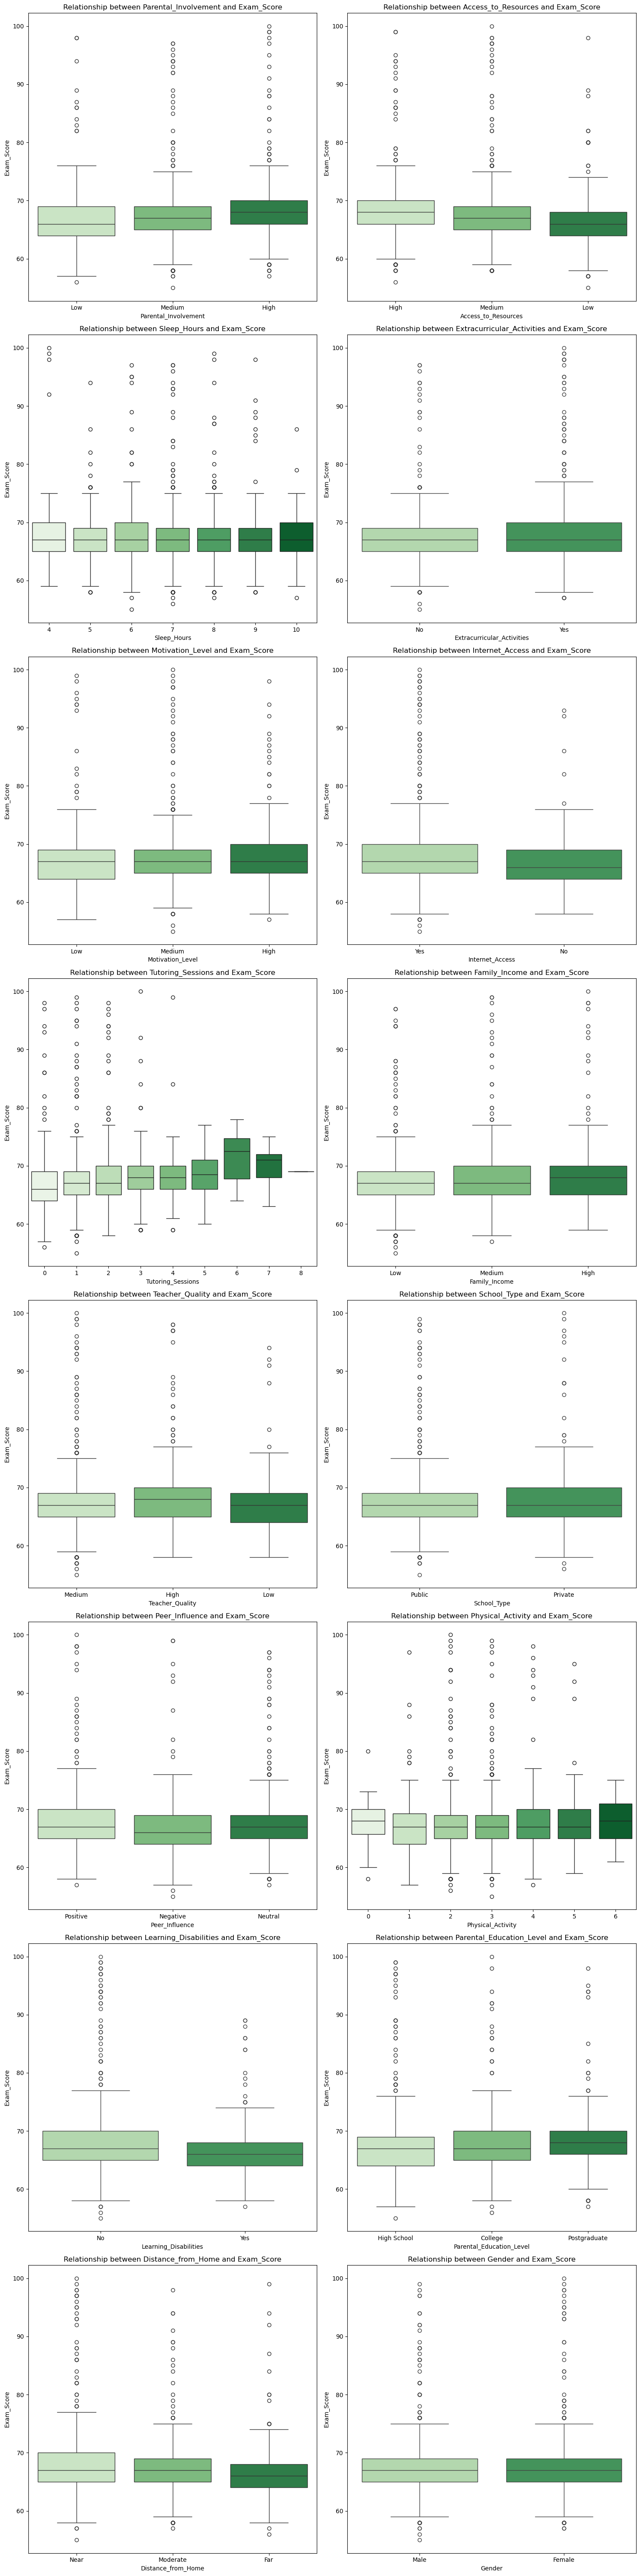

In [124]:
fig, axes = plt.subplots(8, 2, figsize=(15, 60))  

axes = axes.ravel()

for idx, col in enumerate(cat_col):
    sns.boxplot(x=StuPerf_df_cleaned[col], y=StuPerf_df_cleaned[target], ax=axes[idx], palette='Greens')  
    axes[idx].set_title(f'Relationship between {col} and {target}')
    plt.xlabel(col)
    plt.ylabel(target)

plt.tight_layout()  
plt.show()